# MACHINE LEARNING

In this sheet we will use a tree model to make predictions of plant species. This is an example of a **Classification** problem. Many machine learning problems can be expressed mathematically as

$$
y=f(X)
$$

where $X$ represents one or more **predictor** variables, $y$ is a **response** or a **prediction**. The aim is to find a function $f$ which makes the best possible predictions. There are two main types of prediction: **classification** where $y$ is a class, (e.g. cat vs. dog, boat vs. car, fail vs. succeed) or **regression** where $y$ is a number (e.g. height, weight, price, risk).

Here are some examples

| X | y | Type |
|---|---|---|
|Photographs| Cat or Not Cat| Classification|
|Stock history|Future Value| Regression |
|Medical records|Lifespan| Regression |
|Leaf Measurements|Plant Species|Classification|








In [1]:
#Import the libraries needed to run our models
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs

# Generate data

To keep things simple and self contained, in this example we will generate some "invented" data, as opposed to importing a "real world" dataset. When tackling a machine learning problem, the first step is to inspect and visualize the data. The following code creates "training" and "test" data representing the leaf lengths and widths of different plant species.

In [2]:
X, y = make_blobs(n_samples=100000,centers=[[3,3],[5,3],[4,3+8**0.5],[3.5,2]],n_features=2,cluster_std=(1,0.5,2,0.5))
y = np.where(y==3,1,y)
n=100
X_train = X[:n]
y_train = y[:n]
X_test = X[n:]
y_test = y[n:]

#We can put the data into a dataframe to view it
df_train=pd.DataFrame()
df_train['Width']=X_train[:,0]
df_train['Length']=X_train[:,0]
df_train['Species']=y_train

df_train.head()

,Width,Length,Species
0,4.309246,4.309246,2
1,3.760266,3.760266,1
2,4.589748,4.589748,1
3,4.961136,4.961136,2
4,2.670626,2.670626,0


## Create a scatter plot of the data

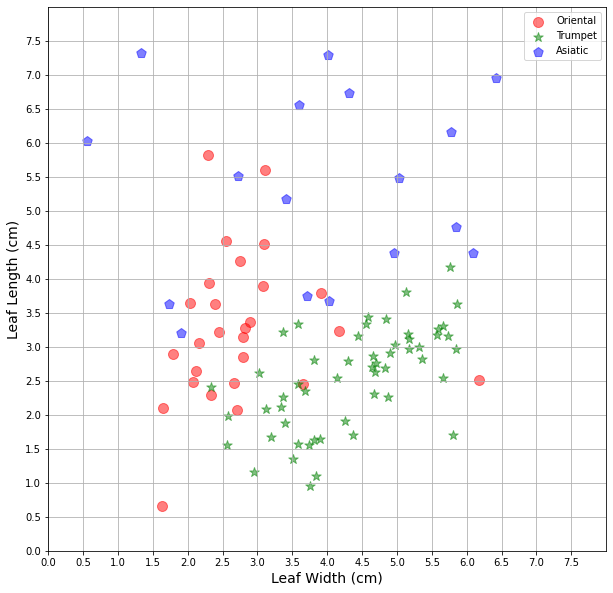

In [3]:
#Plot the data
fig, ax = plt.subplots(figsize=(10,10))
for label,col,lab,mark in zip([0,1,2],['r','g','b'],['Oriental','Trumpet','Asiatic'],['o','*','p']):
    idxs = y_train==label
    ax.scatter(X_train[idxs,0],X_train[idxs,1],c=col,label=lab,marker=mark,s=100,alpha=0.5)
ax.grid(True)
ax.set_xticks(np.arange(0, 8, 0.5))
ax.set_yticks(np.arange(0, 8, 0.5))
ax.set_xlim(0,8)
ax.set_ylim(0,8)
ax.set_xlabel('Leaf Width (cm)',size=14)
ax.set_ylabel('Leaf Length (cm)',size=14)
plt.legend()
plt.show()

# Train a tree classifier

There are many ways to determine the prediction function $f$. One simple and often very effective method is the decision tree. Here we repeatedly split predictor space into smaller and smaller rectangles, and each rectangle is assigned to one of the available classes, according to which class is most common inside it. The tricky mathematical problem is deciding where to make the splits. This is usually done based on **purity** - we try to create rectangles which contain points which are mainly one class. Each final rectangle is a result of a number of splits. The biggest number of splits is called the **depth** of the tree. 

We can test the accuracy of a prediction function by using it to make predictions on **unseen** data. That is, data which are different to what it was trained on. 

$$
\text{Accuracy} = \frac{\text{number of correct test predictions}}{\text{number of test predictions}}
$$

In [4]:
#Function to train and test the tree classifier
def run_tree_classifier(X_train, y_train, X_test, y_test, depth):
    #Create and train the classifier
    clf = DecisionTreeClassifier(random_state=0,max_depth=depth)
    clf.fit(X_train,y_train)
    #Calculate its accuracy on unseen data
    yp = clf.predict(X_test)
    A = (yp==y_test).mean()
    print('At depth {}, classification accuracy is {}'.format(depth,A))
    
    #Visualize the classifier
    vals = np.linspace(0,8,100)
    X1, X2 = np.meshgrid(vals,vals)
    XX = np.array([X1.ravel(),X2.ravel()]).T
    Z = clf.predict(XX).reshape(X1.shape)


    fig, ax = plt.subplots(figsize=(10,10))
    for label,col,lab,mark in zip([0,1,2],['r','g','b'],['Oriental','Trumpet','Asiatic'],['o','*','p']):
        idxs = y_train==label
        ax.scatter(X_train[idxs,0],X_train[idxs,1],c=col,label=lab,marker=mark,s=100,alpha=1)

    newcmp = ListedColormap(['r','g','b'])

    ax.pcolormesh(X1,X2,Z,alpha=0.5,cmap=newcmp)
    ax.grid(True)
    ax.set_xticks(np.arange(0, 8, 0.5))
    ax.set_yticks(np.arange(0, 8, 0.5))
    ax.set_xlim(0,8)
    ax.set_ylim(0,8)
    ax.set_xlabel('Leaf Width (cm)',size=14)
    ax.set_ylabel('Leaf Length (cm)',size=14)
    plt.legend()
    plt.show()
    

## The cell below will train the tree classifier.

**Try changing the depth of the tree and see how this affects accuracy**

At depth 3, classification accuracy is 0.724024024024024


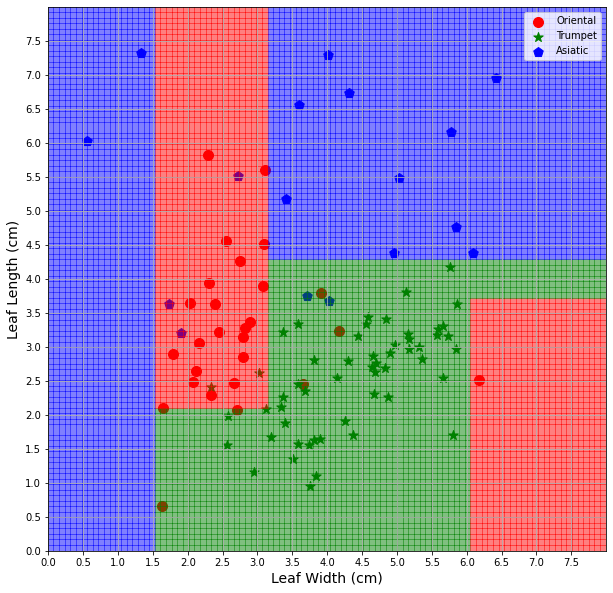

In [5]:
tree_depth = 3
run_tree_classifier(X_train, y_train, X_test, y_test,tree_depth)

## Exercise

* Try training the classifier using different tree depths. 
* What happens as the depth increases?
* Plot a graph of accuracy vs. depth
* What is the optimal depth and how does depth affect flexibility?

# Train a forest classifier

A forest classifier is a set of tree classfiers combined together. Each tree in the forest only uses part of the training data, and the final prediction is majority decision of the trees. Forests are useful because by averaging over many predictions they reduce the chance of overfitting to the data.


In [7]:
#Function to train and test the tree classifier
def run_forest_classifier(X_train, y_train, X_test, y_test, depth):
    #Create and train the classifier
    clf = RandomForestClassifier(random_state=0,max_depth=depth,n_estimators=100)
    clf.fit(X_train,y_train)
    #Calculate its accuracy on unseen data
    yp = clf.predict(X_test)
    A = (yp==y_test).mean()
    print('At depth {}, classification accuracy is {}'.format(depth,A))
    
    #Visualize the classifier
    vals = np.linspace(0,8,100)
    X1, X2 = np.meshgrid(vals,vals)
    XX = np.array([X1.ravel(),X2.ravel()]).T
    Z = clf.predict(XX).reshape(X1.shape)


    fig, ax = plt.subplots(figsize=(10,10))
    for label,col,lab,mark in zip([0,1,2],['r','g','b'],['Oriental','Trumpet','Asiatic'],['o','*','p']):
        idxs = y_train==label
        ax.scatter(X_train[idxs,0],X_train[idxs,1],c=col,label=lab,marker=mark,s=100,alpha=1)

    newcmp = ListedColormap(['r','g','b'])

    ax.pcolormesh(X1,X2,Z,alpha=0.5,cmap=newcmp)
    ax.grid(True)
    ax.set_xticks(np.arange(0, 8, 0.5))
    ax.set_yticks(np.arange(0, 8, 0.5))
    ax.set_xlim(0,8)
    ax.set_ylim(0,8)
    ax.set_xlabel('Leaf Width (cm)',size=14)
    ax.set_ylabel('Leaf Length (cm)',size=14)
    plt.legend()
    plt.show()
    

## The cell below will train the forest classifier.

**Try changing the depth of the trees and see how this affects accuracy**

At depth 5, classification accuracy is 0.7766966966966967


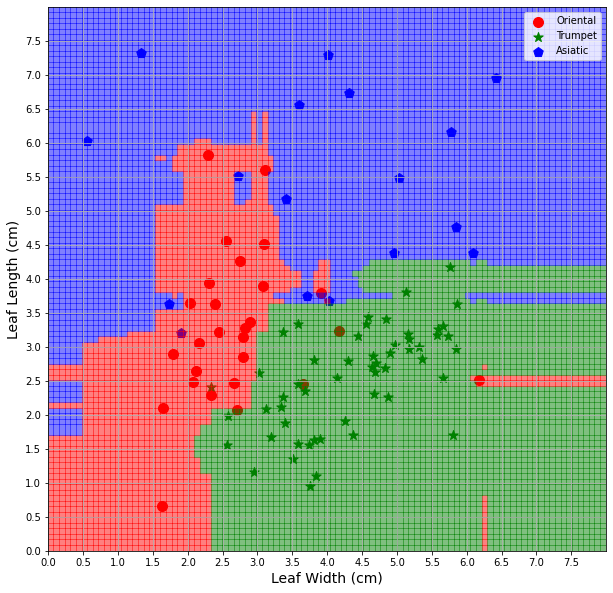

In [8]:
tree_depth = 5
run_forest_classifier(X_train, y_train, X_test, y_test, tree_depth)

## Exercise

* Plot a graph of accuracy vs. depth for the forest classifier.
* What is the optimal tree depth for a forest? 
* How do forest classifier boundaries differ from tree boundaries?